# Algorithmic Trading using Machine Learning

**MS** **in** **Applied** **Data** **Science,** **University** **of** **Southern** **California**

Forecasting the Stock Market Price for the upcoming few days at one time using Recurrent Neural Network with LSTM Architecture.

In [1]:
#Importing Necessary Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import datetime as dt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
#plt.style.use('fivethirtyeight')

In [2]:
#Fetching the Stock Data
end=datetime.now()
start=datetime(end.year - 5, end.month, end.day)
stock_data=pdr.DataReader("CIDM", data_source="yahoo",start=start,end=end)
stock_data.shape

(1259, 6)

In [3]:
stock_data.describe

<bound method NDFrame.describe of             High   Low  Open  Close      Volume  Adj Close
Date                                                      
2016-05-02  2.20  1.80  1.80   2.00     53950.0       2.00
2016-05-03  2.10  2.00  2.10   2.10     26080.0       2.10
2016-05-04  2.70  2.00  2.20   2.70    186860.0       2.70
2016-05-05  2.70  2.20  2.70   2.20     65730.0       2.20
2016-05-06  2.20  2.10  2.20   2.10     14500.0       2.10
...          ...   ...   ...    ...         ...        ...
2021-04-26  1.60  1.32  1.33   1.48  86135600.0       1.48
2021-04-27  1.58  1.41  1.48   1.52  72244800.0       1.52
2021-04-28  1.58  1.48  1.51   1.51  57315900.0       1.51
2021-04-29  1.55  1.44  1.52   1.48  54979100.0       1.48
2021-04-30  1.54  1.43  1.46   1.44  65764600.0       1.44

[1259 rows x 6 columns]>

In [4]:
#Printing the last 5 days stock data
stock_data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-04-26,1.60,1.32,1.33,1.48,86135600.0,1.48
2021-04-27,1.58,1.41,1.48,1.52,72244800.0,1.52
2021-04-28,1.58,1.48,1.51,1.51,57315900.0,1.51
2021-04-29,1.55,1.44,1.52,1.48,54979100.0,1.48
2021-04-30,1.54,1.43,1.46,1.44,65764600.0,1.44


In [5]:
#Reset the Index
stock_data1=stock_data.reset_index()['Close']
stock_data1

0       2.00
1       2.10
2       2.70
3       2.20
4       2.10
        ... 
1254    1.48
1255    1.52
1256    1.51
1257    1.48
1258    1.44
Name: Close, Length: 1259, dtype: float64

# **EXPLORATORY DATA ANALYSIS**

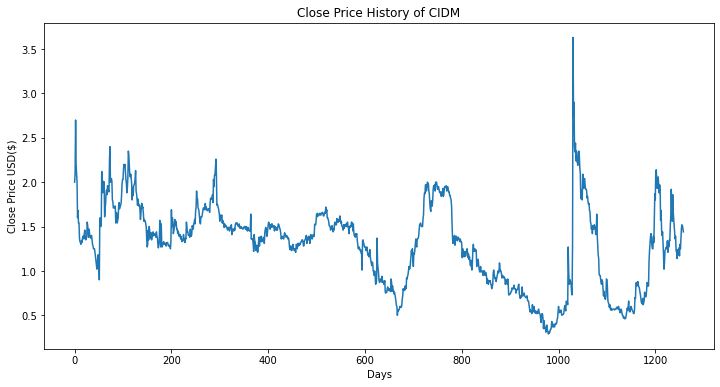

In [6]:
#Plotting the Close Price of the CIDM till today
plt.figure(figsize=(12,6))
plt.title("Close Price History of CIDM",fontsize=12)
plt.plot(stock_data1)
plt.xlabel("Days",fontsize=10)
plt.ylabel("Close Price USD($)",fontsize=10)
plt.show()

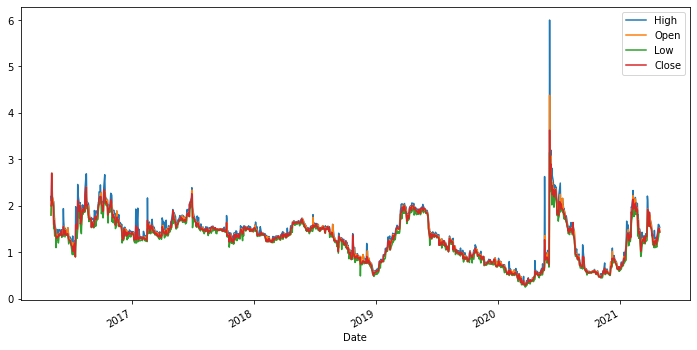

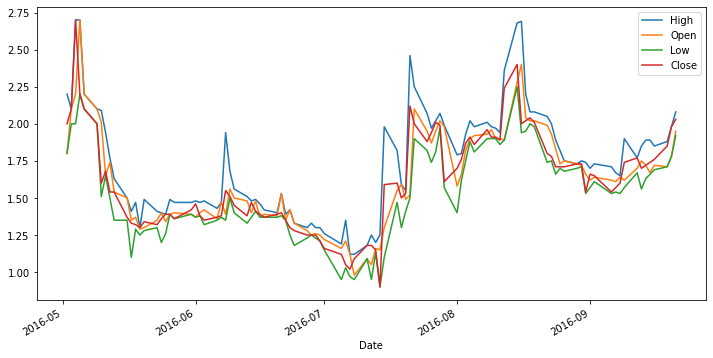

In [7]:
#Evolution of Few Features over time
features = ['High', 'Open', 'Low','Close']
plot_features = stock_data[features]
a=plot_features.plot(subplots=False, figsize=(12,6))

#Lets look at Trend in Few Data
plot_features2 = stock_data[features][:100]
b=plot_features2.plot(subplots=False, figsize=(12,6))

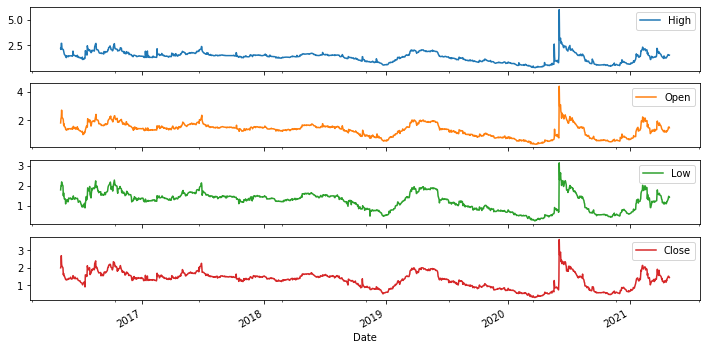

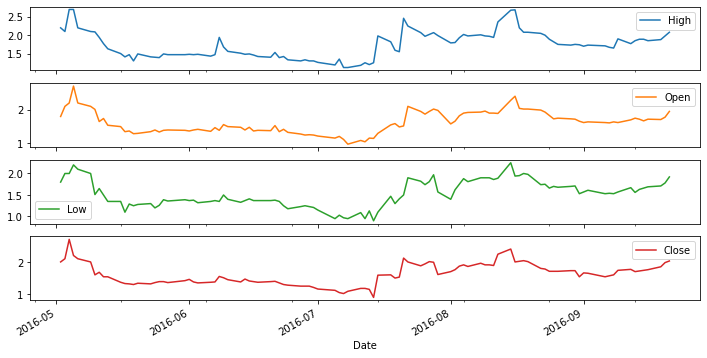

In [8]:
#Lets have a look at individual features
c = plot_features.plot(subplots=True, figsize=(12,6))
d= plot_features2.plot(subplots=True, figsize=(12,6))

**Auto Correlation Map**

 The autocorrelation function (ACF) measures how time series data is correlated with itself at different lags.


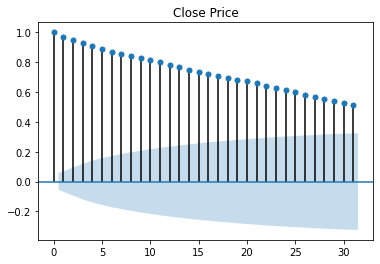

In [9]:
# Autocorrelation Map of Close Price
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(stock_data1,lags=31,title="Close Price")
plt.show()


**Partial Auto Correlation Map**

The partial autocorrelation function can be interpreted as a regression of the series against its past lags. The terms can be interpreted the same way as a standard linear regression, that is the contribution of a change in that particular lag while holding others constant.

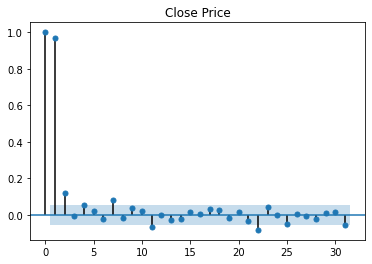

In [10]:
#Partial Auto Correlation Map for Close Price 
plot_pacf(stock_data1,lags=31,title="Close Price") # Checking for 30,60,90,120 Days
plt.show()

Here, As the Time Step Increases from 1st day to 11th day the relation with the 1st data is decreasing .

**Trends and Seasonality**

Trend - To check consistent upwards or downwards slope of a time series

Seasonality - To see clear periodic pattern of a time series

In [11]:
#importing necessary libraries for plotting time series data trends
from pylab import rcParams
from plotly import tools
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm

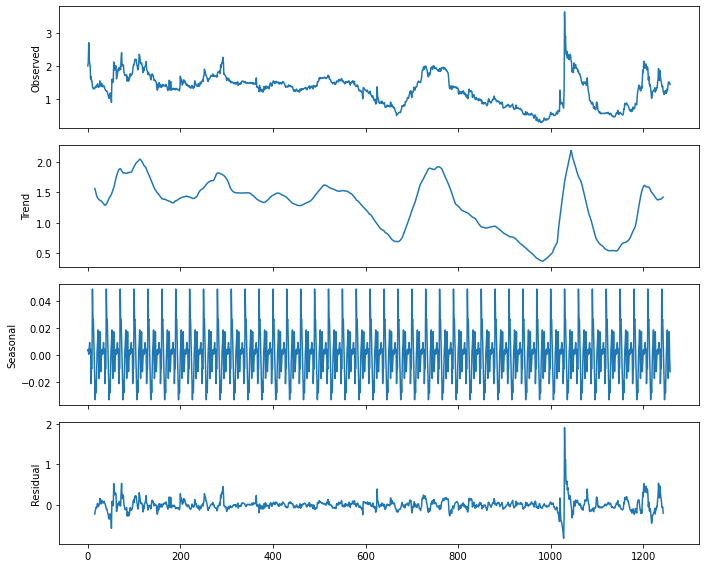

In [12]:
#Decomposing the data for checking Trend and Seasonality of Close price 
rcParams['figure.figsize'] = 10,8
close_trend = sm.tsa.seasonal_decompose(stock_data1,freq=30) 
figure = close_trend.plot()
plt.show()

**Dickey-Fuller Test**

To Check wheather the time series data is stationary or not?

In [13]:
#Dickey-Fuller Test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()
   
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    if dftest[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

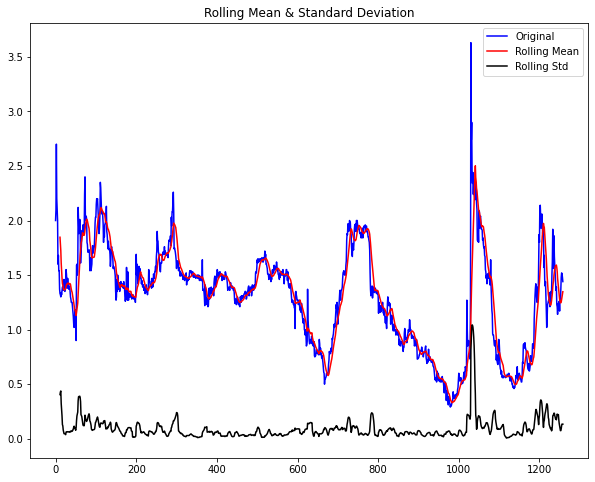

Results of Dickey-Fuller Test:
Test Statistic                   -3.280133
p-value                           0.015790
#Lags Used                       10.000000
Number of Observations Used    1248.000000
Critical Value (1%)              -3.435601
Critical Value (5%)              -2.863859
Critical Value (10%)             -2.568004
dtype: float64
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [14]:
#Checking Stationarity for Temperature Data
test_stationarity(stock_data1)

**UNIVARIATE STOCK MARKET PRICE PREDICTION USING LSTM**

In [15]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
stock_data1=scale.fit_transform(np.array(stock_data1).reshape(-1,1))
print("Scaled Close Price:",stock_data1)

Scaled Close Price: [[1.53380177]
 [1.75140745]
 [3.05704309]
 ...
 [0.46753289]
 [0.40225118]
 [0.31520891]]


Taking 70% of total data as training data and 30% as testing data.

In [16]:
##splitting dataset into train and test split
train_size=int(len(stock_data1)*0.70)
test_size=len(stock_data1)-train_size
train_data,test_data=stock_data1[0:train_size,:],stock_data1[train_size:len(stock_data1),:1]

In [17]:
#Size of Train & Test Data
train_size,test_size

(881, 378)

Here, I took Time Stamp of 90 past days and Prediction Stamp of next 30 days to forecast the close price

In [18]:
# convert an array of values into a dataset matrix
import numpy
def create_dataset(dataset, time_stamp, pred_stamp):
	X, y = [], []
	for i in range(len(dataset)-time_stamp-pred_stamp):
		a = dataset[i:(i+time_stamp), 0]    
		X.append(a)
		y.append(dataset[i+time_stamp:(i+time_stamp)+pred_stamp,0])
	return numpy.array(X), numpy.array(y)

In [19]:
#Creating the Time_Stamp of 90 days for Splitting the dataset into Training and Testing Data
time_stamp = 60  #Number of Past days to make our model train 
pred_stamp = 15 #Number of Future days to predict

X_train, y_train = create_dataset(train_data, time_stamp, pred_stamp)
X_test, y_test = create_dataset(test_data, time_stamp, pred_stamp)

In [20]:
#lets have a look at the data
X_train

array([[ 1.53380177,  1.75140745,  3.05704309, ...,  1.53380177,
         1.27267469,  1.40323836],
       [ 1.75140745,  3.05704309,  1.96901365, ...,  1.27267469,
         1.40323836,  1.55556233],
       [ 3.05704309,  1.96901365,  1.75140745, ...,  1.40323836,
         1.55556233,  1.5120412 ],
       ...,
       [-0.29408777, -0.20704524, -0.18528467, ..., -0.96866591,
        -0.9904266 , -1.07746888],
       [-0.20704524, -0.18528467, -0.29408777, ..., -0.9904266 ,
        -1.07746888, -0.9904266 ],
       [-0.18528467, -0.29408777, -0.16352411, ..., -1.07746888,
        -0.9904266 , -0.9904266 ]])

In [21]:
#Shape of the Dataset
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(y_test.shape)

(806, 60)
(806, 15)
(303, 60)
(303, 15)


(None, None)

In [22]:
# reshape input to be [samples, time stamp, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [23]:
pip install tensorflow-addons

     |████████████████████████████████| 706kB 4.9MB/s 


In [24]:
#Importing Necessary Libraries of Tensorflow for training LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.layers.core import Dense, Activation, Dropout,Flatten
from keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import tensorflow_addons as tfa
import tensorflow as tf

In [25]:
#For Choosing Right number of Hidden Nodes
time_dim=1
hidden_nodes = int(2/3 * (time_stamp * time_dim))
print(f"The number of hidden nodes is {hidden_nodes}.")

The number of hidden nodes is 40.


In [26]:
#Training Sequential Model using 3 Hidden layers
model=Sequential()
model.add(LSTM(128,input_shape=(time_stamp,time_dim),return_sequences=True)) #66
model.add(LSTM(64,return_sequences=True)) #66
model.add(LSTM(32,return_sequences=False))

model.add(Dropout(0.25))
model.add(Dense(32))
model.add(Dense(pred_stamp,activation='linear'))

#Summary of Model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 128)           66560     
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 64)            49408     
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dense_1 (Dense)              (None, 15)                495       
Total params: 129,935
Trainable params: 129,935
Non-trainable params: 0
__________________________________________________

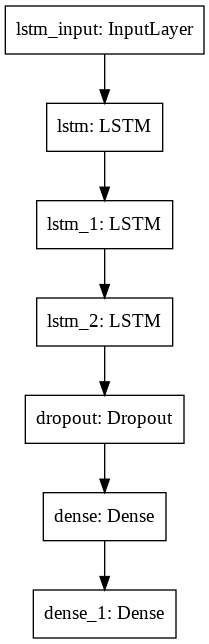

In [27]:
#Architecture of LSTM Model
tf.keras.utils.plot_model(model)

In [28]:
#Model Compilation (With Matrics including Macro and Micro F1 Score and AUC Score)
opt = Adam(lr=0.001)
model.compile(optimizer=opt,
              loss="mean_squared_error",
              metrics=[
                       tf.keras.metrics.MeanAbsoluteError(),
                      ])

In [29]:
%%time
#Callbacks
#rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
es= EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1) #pat=10
#Model Fitting
lstm = model.fit(X_train, y_train,  
                    epochs=100, 
                    callbacks=[es],
                    validation_data=(X_test,y_test), 
                    verbose=2,
                    batch_size=128) #64

Epoch 1/100
7/7 - 9s - loss: 0.4999 - mean_absolute_error: 0.5480 - val_loss: 1.7647 - val_mean_absolute_error: 1.1536
Epoch 2/100
7/7 - 2s - loss: 0.3485 - mean_absolute_error: 0.4606 - val_loss: 1.5126 - val_mean_absolute_error: 1.0494
Epoch 3/100
7/7 - 2s - loss: 0.2623 - mean_absolute_error: 0.3873 - val_loss: 1.3193 - val_mean_absolute_error: 0.9408
Epoch 4/100
7/7 - 2s - loss: 0.2092 - mean_absolute_error: 0.3458 - val_loss: 1.0684 - val_mean_absolute_error: 0.7905
Epoch 5/100
7/7 - 2s - loss: 0.1753 - mean_absolute_error: 0.3165 - val_loss: 1.0716 - val_mean_absolute_error: 0.7289
Epoch 6/100
7/7 - 2s - loss: 0.1677 - mean_absolute_error: 0.3064 - val_loss: 0.9419 - val_mean_absolute_error: 0.6936
Epoch 7/100
7/7 - 2s - loss: 0.1556 - mean_absolute_error: 0.3016 - val_loss: 0.8209 - val_mean_absolute_error: 0.7134
Epoch 8/100
7/7 - 2s - loss: 0.1386 - mean_absolute_error: 0.2777 - val_loss: 0.8675 - val_mean_absolute_error: 0.7058
Epoch 9/100
7/7 - 2s - loss: 0.1366 - mean_absol

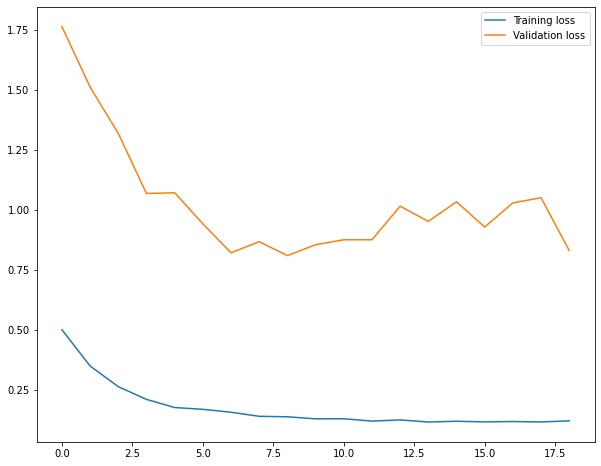

In [30]:
#Plotting Traning and Validation Loss of LSTM Architecture
plt.plot(lstm.history['loss'], label='Training loss')
plt.plot(lstm.history['val_loss'], label='Validation loss')
plt.legend()

In [31]:
# Perform predictions
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [32]:
#Scaled Predicted Close Price
test_predict

array([[-1.3454012 , -1.3322246 , -1.3330039 , ..., -1.2182629 ,
        -1.2910419 , -1.2361047 ],
       [-1.3595141 , -1.3426828 , -1.3460202 , ..., -1.2318166 ,
        -1.3036011 , -1.2473669 ],
       [-1.3756858 , -1.3549302 , -1.3609071 , ..., -1.247711  ,
        -1.3190324 , -1.2606533 ],
       ...,
       [ 0.77881026,  0.7576264 ,  0.7752773 , ...,  0.70753837,
         0.7398845 ,  0.7362151 ],
       [ 0.66042477,  0.66063917,  0.675554  , ...,  0.60806084,
         0.64195114,  0.6442654 ],
       [ 0.52894413,  0.5485904 ,  0.55906075, ...,  0.49517006,
         0.5303472 ,  0.5374721 ]], dtype=float32)

In [33]:
#Perfoming Inverse Transformation to get original data
train_predict=scale.inverse_transform(train_predict)
test_predict=scale.inverse_transform(test_predict)

In [34]:
#Shape of the Predicted Dataset
print(train_predict.shape), print(test_predict.shape)

(806, 15)
(303, 15)


(None, None)

In [35]:
#Predicted Close Price
test_predict

array([[0.6768727 , 0.68292797, 0.6825698 , ..., 0.73529863, 0.70185333,
        0.7270995 ],
       [0.67038715, 0.6781219 , 0.67658824, ..., 0.72907007, 0.69608176,
        0.721924  ],
       [0.6629555 , 0.6724937 , 0.669747  , ..., 0.7217659 , 0.68899035,
        0.7158183 ],
       ...,
       [1.6530464 , 1.6433114 , 1.6514229 , ..., 1.6202936 , 1.6351582 ,
        1.633472  ],
       [1.5986427 , 1.5987413 , 1.6055954 , ..., 1.5745791 , 1.5901532 ,
        1.5912168 ],
       [1.5382214 , 1.5472497 , 1.5520613 , ..., 1.5227005 , 1.538866  ,
        1.5421404 ]], dtype=float32)

In [36]:
#Performing Inverse Transformation of Close Price
y_test=scale.inverse_transform(y_test)
y_train=scale.inverse_transform(y_train)

In [37]:
#Calculating Mean Absolute Error on Test Data
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(test_predict, y_test)
print("Mean Absolute Error on Test Data:",MAE)

MAE2 = mean_absolute_error(train_predict, y_train)
print("Mean Absolute Error on Train Data:",MAE2)

Mean Absolute Error on Test Data: 0.31688158455723847
Mean Absolute Error on Train Data: 0.11107232576564288


In [38]:
#Creating Train and Predicted Close Price for Graph Visualization

#Training Close Price of 60 days Batch to forecast next 15 days
close_train = pd.DataFrame()
close_train['Original'] = y_train[-1]
close_train['Predicted']=train_predict[-1]

#Predicted Close Price of 60 days Batch to forecast next 15 days
close_test = pd.DataFrame()
close_test['Original'] = y_test[-1]
close_test['Predicted']=test_predict[-1]

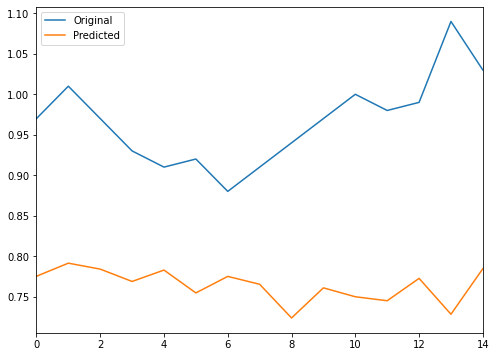

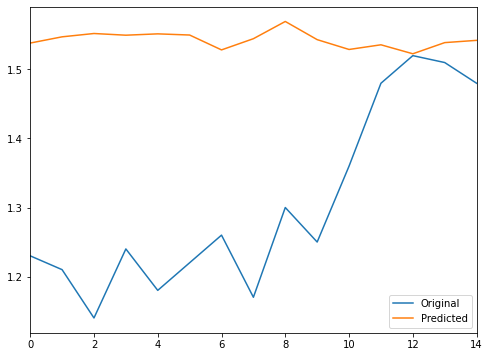

In [39]:
#Visualization of Train vs. Test Prediction
close_train[['Original','Predicted']].plot(figsize=(8,6)).autoscale(axis='x',tight=True);
close_test[['Original','Predicted']].plot(figsize=(8,6)).autoscale(axis='x',tight=True);

Here, The Blue Line Depicts original close price,
Orange Line is the Prediction on Training Data and
Green line is the prediction on Testing Data


As, you can see that, the error here is larger than the error in Moving Window Methodology in predicting the stock market price

In [40]:
#Forecasted Next 15 days Close Price
close_test['Predicted']

0     1.538221
1     1.547250
2     1.552061
3     1.549610
4     1.551546
5     1.549853
6     1.528315
7     1.544536
8     1.569500
9     1.543172
10    1.528942
11    1.535702
12    1.522701
13    1.538866
14    1.542140
Name: Predicted, dtype: float32

In [41]:
#Creating the List of Next 15 days Dates
import datetime 
i=0
weekdays=[]
for i in range(50):
  if len(weekdays)<15:
    NextDay_Date = datetime.datetime.today() + datetime.timedelta(days=i+1)
    if NextDay_Date.isoweekday()!=6 and NextDay_Date.isoweekday()!=7:
      weekdays.append(NextDay_Date)

In [42]:
#Strip the date in Y-M-D Format
dates=[]
for i in weekdays:
  a= i.strftime("%Y-%m-%d")
  dates.append(a)

In [43]:
#Converting to Dataframe
dates=pd.DataFrame(dates)

In [44]:
#Merging Future Dates and Predicted Values
final=dates.merge(close_test['Predicted'],how='left',on=dates.index)
#Reset Index
final.set_index(0,inplace=True)
#Drop Previous Index
final.drop(columns='key_0', inplace=True)

In [45]:
#Forecasted 15 days Close Price
final

,Predicted
0,
2021-05-03,1.538221
2021-05-04,1.547250
2021-05-05,1.552061
2021-05-06,1.549610
2021-05-07,1.551546
2021-05-10,1.549853
2021-05-11,1.528315
2021-05-12,1.544536
2021-05-13,1.569500


In [46]:
#Rename the Dataframe Name
final.rename(columns = {0:"Predicted"}, inplace = True)
final.index.names = ['Date']

In [47]:
print("""Next 15 Days Forecasted Close Price""")
#Creating a Table to store the above output.

from tabulate import tabulate
print(tabulate(final,headers="keys",tablefmt="fancy_grid"))

Next 15 Days Forecasted Close Price
╒════════════╤═════════════╕
│ Date       │   Predicted │
╞════════════╪═════════════╡
│ 2021-05-03 │     1.53822 │
├────────────┼─────────────┤
│ 2021-05-04 │     1.54725 │
├────────────┼─────────────┤
│ 2021-05-05 │     1.55206 │
├────────────┼─────────────┤
│ 2021-05-06 │     1.54961 │
├────────────┼─────────────┤
│ 2021-05-07 │     1.55155 │
├────────────┼─────────────┤
│ 2021-05-10 │     1.54985 │
├────────────┼─────────────┤
│ 2021-05-11 │     1.52831 │
├────────────┼─────────────┤
│ 2021-05-12 │     1.54454 │
├────────────┼─────────────┤
│ 2021-05-13 │     1.5695  │
├────────────┼─────────────┤
│ 2021-05-14 │     1.54317 │
├────────────┼─────────────┤
│ 2021-05-17 │     1.52894 │
├────────────┼─────────────┤
│ 2021-05-18 │     1.5357  │
├────────────┼─────────────┤
│ 2021-05-19 │     1.5227  │
├────────────┼─────────────┤
│ 2021-05-20 │     1.53887 │
├────────────┼─────────────┤
│ 2021-05-21 │     1.54214 │
╘════════════╧═════════════╛
